In [1]:
import pandas as pd

In [2]:
mcxc = pd.read_csv('MCXC.csv')

In [3]:
mcxc.head()

,Unnamed: 0,MCXC,OName,AName,RAdeg,DEdeg,z,M500
0,0,J0000.1+0816,RXC J0000.1+0816,UGC 12890 ...,0.030,8.274,0.0396,0.7373
1,1,J0000.4-0237,RXC J0000.4-0237,...,0.103,-2.625,0.0379,0.3297
2,2,J0001.6-1540,RXC J0001.6-1540,...,0.412,-15.681,0.1246,1.6557
3,3,J0001.9+1204,RXC J0001.9+1204,A2692 ...,0.488,12.073,0.2033,2.6927
4,4,J0003.1-0605,RXCJ0003.1-0605,A2697 ...,0.799,-6.086,0.2320,5.2188


In [4]:
filename = '/home/rt2122/Desktop/data-segmentation/data_src/redmapper_dr8_public_v6.3_catalog.fits'
from astropy.io import fits
import pandas as pd
r_z = None
r_m = None
redmapper = None
with fits.open(filename) as table:
    table.verify('fix')

    data = table[1].data
    keys = data.names
    print(keys)
    saved_keys = ['NAME', 'RA', 'DEC', 'LAMBDA', 'Z_SPEC']
    
    redmapper = pd.DataFrame([])
    for key in saved_keys:
        redmapper[key] = data[key]
        print(key, '\t', redmapper[key].min(), '\t', redmapper[key].max())
    print(redmapper.head())
    print(redmapper.shape)
    redmapper.to_csv('./redmapper.csv')


['ID', 'NAME', 'RA', 'DEC', 'Z_LAMBDA', 'Z_LAMBDA_ERR', 'LAMBDA', 'LAMBDA_ERR', 'S', 'Z_SPEC', 'OBJID', 'IMAG', 'IMAG_ERR', 'MODEL_MAG_U', 'MODEL_MAGERR_U', 'MODEL_MAG_G', 'MODEL_MAGERR_G', 'MODEL_MAG_R', 'MODEL_MAGERR_R', 'MODEL_MAG_I', 'MODEL_MAGERR_I', 'MODEL_MAG_Z', 'MODEL_MAGERR_Z', 'ILUM', 'P_CEN', 'RA_CEN', 'DEC_CEN', 'ID_CEN', 'PZBINS', 'PZ']
NAME 	 RMJ000002.3+051717.8 	 RMJ235954.1-110813.5
RA 	 0.009573451801770716 	 359.9754387159011
DEC 	 -11.201826615164308 	 68.72255623374552
LAMBDA 	 19.850935 	 299.45935
Z_SPEC 	 -1.0 	 0.943789
                   NAME          RA        DEC      LAMBDA    Z_SPEC
0  RMJ155820.0+271400.3  239.583329  27.233413  169.837845  0.090807
1  RMJ164019.8+464241.5  250.082548  46.711531  199.539276 -1.000000
2  RMJ131129.5-012028.0  197.872957  -1.341116  164.712173 -1.000000
3  RMJ090912.2+105824.9  137.300745  10.973595  174.704178 -1.000000
4  RMJ133520.1+410004.1  203.833723  41.001146  189.181152  0.228309
(26111, 5)


In [5]:
def ra_dec_distance(ra, dec, ra1, dec1):
    import numpy as np
    from astropy import units as u
    from astropy.coordinates import SkyCoord
    c1 = SkyCoord(ra=ra, dec=dec, unit='deg')
    c2 = SkyCoord(ra=ra1, dec=dec1, unit='deg')
    sep = c1.separation(c2)
    return sep.degree

In [6]:
dists = []
for i in range(mcxc.shape[0]):
    d = ra_dec_distance(mcxc.iloc[i]['RAdeg'], mcxc.iloc[i]['DEdeg'],
                       redmapper['RA'], redmapper['DEC'])
    d = list(d)
    d = [x for x in d if x < 1.0]
    dists.extend(d)

In [8]:
len(dists)
pd.DataFrame(dists).to_csv('./dists_less1.csv')

In [9]:
def histogram(data, n_bins = 0):
    import matplotlib.pyplot as plt
    max_nbins = 10
    data_range = [min(data), max(data)]
    bins = n_bins

    _, ax = plt.subplots()
    ax.hist(data, bins = bins, alpha = 1, label = "")
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.set_title("")
    ax.legend(loc = 'best')

No handles with labels found to put in legend.


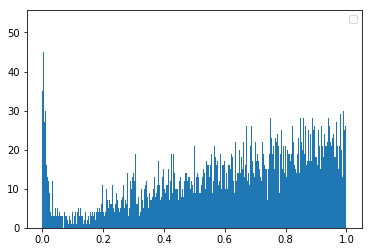

In [12]:
histogram(dists, 500)